In [1]:
import sys
import yaml

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

sys.path.append('../src')
sys.path.append('../../../utils')
from unet import Unet
from train_utils import Trainer
from eval_utils import evaluate_model, get_pixel_accuracy
from isbi_em_dataset import ISBIEMDataset

In [2]:

with open('../configs/train_config.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# Load dataset.

transform = transforms.Compose([
    transforms.ToTensor()
])

DATA_DIR = '/home/kramasamy/Code/projects/cnn/data/isbi_em_segmentation'
train_dataset = ISBIEMDataset(DATA_DIR, transform=transform, train=False)
test_dataset = ISBIEMDataset(DATA_DIR, transform=transform, train=False)

In [3]:
# Load model.
model = Unet()
trainer = Trainer(model, train_dataset, config)
result = trainer.train(print_loss=True)

 10%|█         | 1/10 [00:18<02:44, 18.25s/it]

Epoch 1/10,                    Loss: 0.6461493730545044


 20%|██        | 2/10 [00:37<02:29, 18.67s/it]

Epoch 2/10,                    Loss: 0.5762051860491435


 30%|███       | 3/10 [00:56<02:11, 18.82s/it]

Epoch 3/10,                    Loss: 0.5556000749270121


 40%|████      | 4/10 [01:15<01:53, 18.90s/it]

Epoch 4/10,                    Loss: 0.5276294469833374


 50%|█████     | 5/10 [01:34<01:34, 18.93s/it]

Epoch 5/10,                    Loss: 0.521410483121872


 60%|██████    | 6/10 [01:53<01:15, 18.96s/it]

Epoch 6/10,                    Loss: 0.5069618225097656


 70%|███████   | 7/10 [02:12<00:56, 18.98s/it]

Epoch 7/10,                    Loss: 0.49402483105659484


 80%|████████  | 8/10 [02:31<00:37, 18.99s/it]

Epoch 8/10,                    Loss: 0.479364013671875


 90%|█████████ | 9/10 [02:50<00:18, 19.00s/it]

Epoch 9/10,                    Loss: 0.4601073245207469


100%|██████████| 10/10 [03:25<00:00, 20.54s/it]

Epoch 10/10,                    Loss: 0.4753381828467051


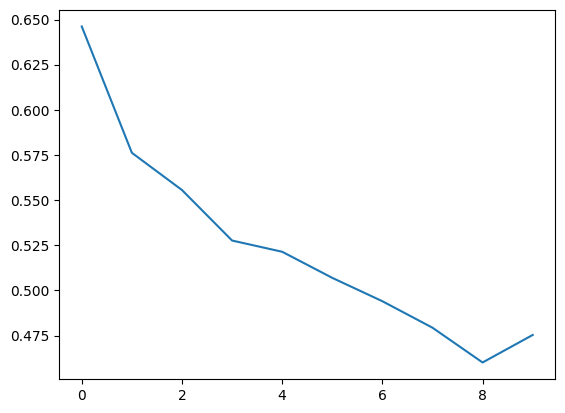

In [4]:
import matplotlib.pyplot as plt

plt.plot(result['loss_history'])

In [5]:
torch.cuda.empty_cache()
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)
y_pred_train, y_true_train = evaluate_model(model, train_loader)
y_pred_test, y_true_test = evaluate_model(model, test_loader)

In [6]:
print(get_pixel_accuracy(y_pred_train, y_true_train))
print(get_pixel_accuracy(y_pred_test, y_true_test))

72.97364044189453
72.97364044189453
